Subset: test
10 most significant terms in "comp.sys.ibm.pc.hardware" (subset: test):
['scsi', 'ide', 'drive', 'pc', 'card', 'bios', 'controller', 'modem', 'use', 'dos']
[0.29189135779696734, 0.22239341546435604, 0.19350621026634496, 0.17117774563211433, 0.16162030333484786, 0.1598631816832936, 0.15246353195838805, 0.1464518357434138, 0.12489516371556747, 0.12463986020716068]

10 most significant terms in "comp.sys.mac.hardware" (subset: test):
['mac', 'apple', 'mhz', 'monitor', 'disk', 'quadra', 'scsi', 'drive', 'iisi', 'software']
[0.3643033849617838, 0.22044915292053077, 0.1852212786480824, 0.15764942003172808, 0.13967362980748232, 0.1297808365516945, 0.12900486214841045, 0.125717890340979, 0.11983054493557803, 0.11913759467925569]

10 most significant terms in "misc.forsale" (subset: test):
['sale', 'shipping', 'new', '1st', 'drive', 'forsale', 'condition', 'offer', 'rider', 'hobgoblin']
[0.1565711090072673, 0.15446357986949094, 0.15230445304842974, 0.12597168903399225, 0.1213290836

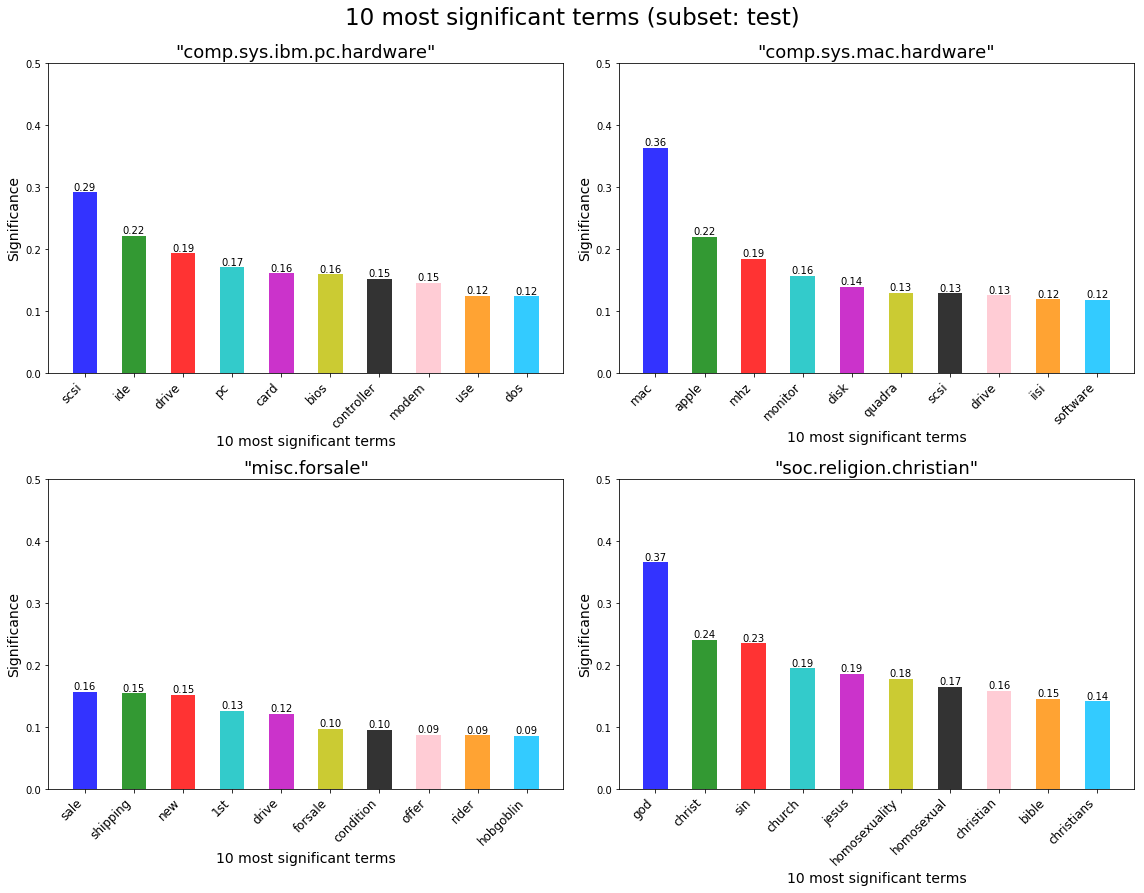

Subset: all
10 most significant terms in "comp.sys.ibm.pc.hardware" (subset: all):
['scsi', 'drive', 'ide', 'controller', 'bios', 'card', 'disk', 'dos', 'use', 'drives']
[0.44587373478640835, 0.24157499653143932, 0.21658419309231167, 0.18662173915537625, 0.17311247778004107, 0.1548522103237198, 0.12720636295462984, 0.1210834662806838, 0.12061420199848046, 0.11560578268518244]

10 most significant terms in "comp.sys.mac.hardware" (subset: all):
['mac', 'apple', 'scsi', 'drive', 'quadra', 'monitor', 'use', 'know', 'nubus', 'like']
[0.31078404034476015, 0.21808294969988062, 0.19681209495463167, 0.15227971202754056, 0.14439305519213094, 0.13030090712911918, 0.1295306087063531, 0.12720927163276255, 0.12711525371614948, 0.12303086490029953]

10 most significant terms in "misc.forsale" (subset: all):
['new', 'sale', 'shipping', 'dos', 'offer', 'hulk', 'comics', 'price', 'drive', 'condition']
[0.18336368592303134, 0.17103495099217042, 0.15894377908190527, 0.1420579392308168, 0.119325609060541,

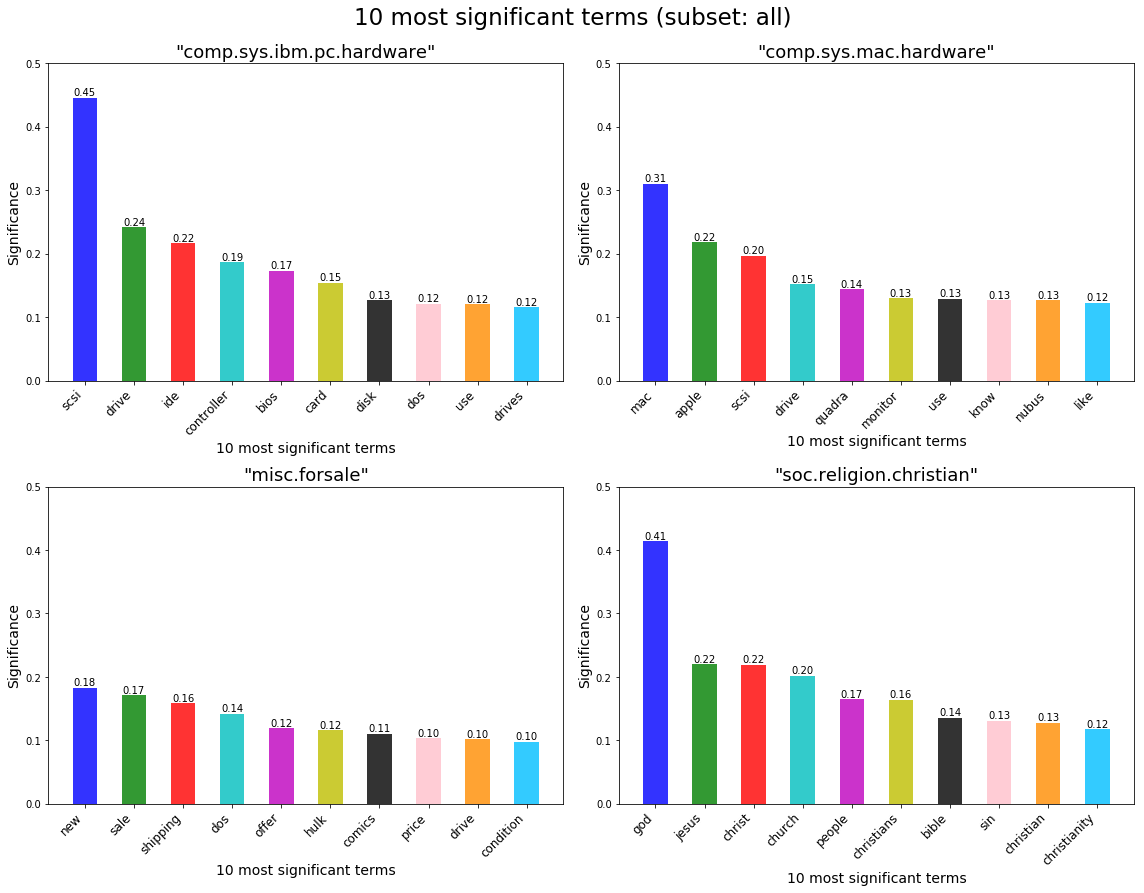

Subset: train
10 most significant terms in "comp.sys.ibm.pc.hardware" (subset: train):
['scsi', 'drive', 'ide', 'controller', 'bios', 'card', 'disk', 'drives', 'bus', 'dos']
[0.4776648109086148, 0.2451934346698935, 0.21115654731153358, 0.20845088073868093, 0.16708018063970861, 0.14937418560227075, 0.13811273203544283, 0.1348947180559273, 0.11015002895131475, 0.10969459653493248]

10 most significant terms in "comp.sys.mac.hardware" (subset: train):
['mac', 'apple', 'scsi', 'drive', 'quadra', 'nubus', 'simms', 'duo', 'use', 'fpu']
[0.30129378013429814, 0.22239349628405197, 0.2158730810985146, 0.15284822139318735, 0.14249574447348326, 0.14249574447348326, 0.1370795653469959, 0.13094203546211977, 0.1253210535593432, 0.12524209499009875]

10 most significant terms in "misc.forsale" (subset: train):
['dos', 'new', 'shipping', 'sale', 'offer', 'condition', 'price', 'good', 'used', 'like']
[0.2108466144343181, 0.1869811160009701, 0.17912734041519737, 0.17423624809628974, 0.1311558187776589, 0

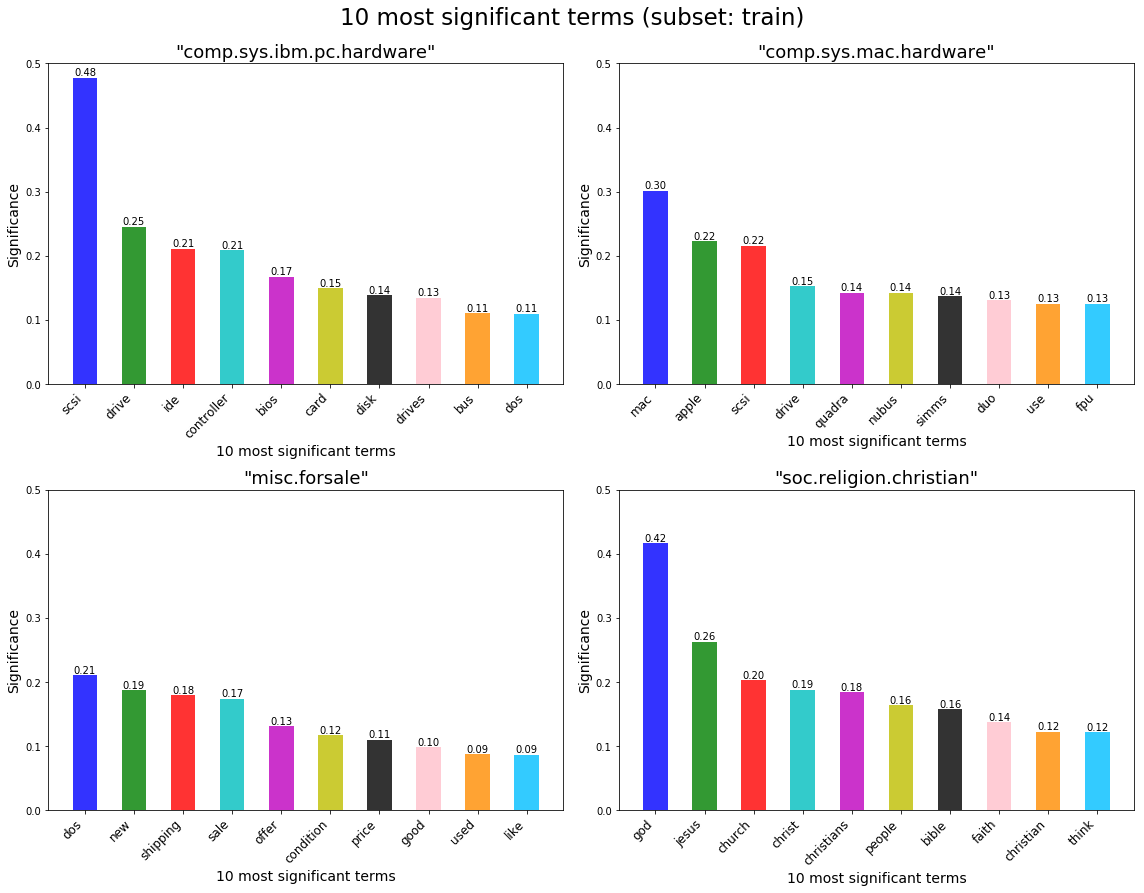

In [28]:
from sklearn.datasets import fetch_20newsgroups
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import re

stemmer = SnowballStemmer("english")

# merge documents in one class into a document
def join_data(category, subset):
    data_list = fetch_20newsgroups(subset=subset, categories=[category], shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes')).data
    return [" ".join(data_list)]

def trim_and_stem(data_list):
    for i in range(len(data_list)):
        temp = re.findall('[a-zA-Z]+', data_list[i])
        ans = []
        for j in range(len(temp)):
            if not temp[j].isdigit():
                ans.append(stemmer.stem(temp[j])) # stem() turned words into lowercase            
        data_list[i] = " ".join(ans)

def ten_most(subset, categories, indices):
    print 'Subset: ' + subset
    # merge classes
    classes = []
    for category in categories:
        data_list = fetch_20newsgroups(subset=subset, categories=[category], shuffle=True, random_state=42, remove=('headers', 'footers', 'quotes')).data
        trim_and_stem(data_list)
        classes += join_data(category, subset)
    
    # count words and generate tfidf
    count_vect = CountVectorizer(min_df=2, stop_words ='english')
    X_counts = count_vect.fit_transform(classes)
    tfidf_transformer = TfidfTransformer()
    X_tfidf = tfidf_transformer.fit_transform(X_counts).toarray()
    
    # sort words according to their importance
    global_res = []
    global_sig = []
    for index in indices:
        print '10 most significant terms in \"' + categories[index]+ '\" (subset: ' + subset + '):'
        sorted_index = np.argsort(X_tfidf[index])
        res = []
        sig = []
        i = 1
        while len(res) < 10:
            cur = count_vect.get_feature_names()[sorted_index[-i]]
            utf8string = cur.encode("utf-8")
            if (not utf8string.isdigit()):
                res.append(utf8string)
                sig.append(X_tfidf[index][sorted_index[-i]])
            i += 1
        print res
        print sig
        print ''
        global_res.append(res)
        global_sig.append(sig)
    return global_res, global_sig

categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 
            'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 
            'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 
            'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 
            'talk.politics.misc', 'talk.religion.misc']
indices = [3, 4, 6, 15]

for subset in ['test', 'all', 'train']:
    pair = ten_most(subset, categories, indices)
    res = pair[0]
    sig = pair[1]
    # plot histogram
    fig = plt.figure(figsize=(16,12))
    figure_title = '10 most significant terms (subset: ' + subset + ')'
    fig.suptitle('10 most significant terms (subset: ' + subset + ')', y=1.03, fontsize=23)
    for i in range(4):
        ax = plt.subplot(221+i)
        ax.set_title('\"' + categories[indices[i]]+ '\"', fontsize=18)
        color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'pink', 'darkorange', 'deepskyblue']
        ax.set_xticks([j+0.25 for j in range(1, 11)])
        ax.set_xticklabels(res[i], rotation=45, ha='right', fontsize=12)
        rects = plt.bar([j for j in range(1, 11)], sig[i], 0.5, align='edge', alpha = 0.8, color = color)
        ax.set_xlabel('10 most significant terms', fontsize=14)
        ax.set_ylabel('Significance', fontsize=14)
        ax.axis([0.5,11,0,0.5])
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*height, '%.2f' % float(height), ha='center', va='bottom')
    plt.tight_layout()
    plt.show()